#**Aula 1: Realizando as primeiras consultas**

##**Conhecendo os dados**

In [ ]:
url = 'https://raw.githubusercontent.com/alura-cursos/llamaIndex_pandas_query/refs/heads/main/Dados/vendas.csv'

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.head()

,ID_compra,filial,cidade,tipo_cliente,genero,tipo_produto,preco_unitario,quantidade,imposto_5%,total,data,hora,forma_pagamento,avaliacao
0,750-67-8428,A,Santo André,Membro,Feminino,Saúde e Beleza,74.69,7,26.1415,548.9715,2024-01-05,13:08:00,Carteira Digital,9.1
1,226-31-3081,C,São Caetano,Normal,Feminino,Eletrônicos,15.28,5,3.8200,80.2200,2024-03-08,10:29:00,Dinheiro,9.6
2,631-41-3108,A,Santo André,Normal,Masculino,Casa,46.33,7,16.2155,340.5255,2024-03-03,13:23:00,Cartão de Crédito,7.4
3,123-19-1176,A,Santo André,Membro,Masculino,Saúde e Beleza,58.22,8,23.2880,489.0480,2024-01-27,20:33:00,Carteira Digital,8.4
4,373-73-7910,A,Santo André,Normal,Masculino,Esportes e Viagem,86.31,7,30.2085,634.3785,2024-02-08,10:37:00,Carteira Digital,5.3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_compra        1000 non-null   object 
 1   filial           1000 non-null   object 
 2   cidade           1000 non-null   object 
 3   tipo_cliente     1000 non-null   object 
 4   genero           1000 non-null   object 
 5   tipo_produto     1000 non-null   object 
 6   preco_unitario   1000 non-null   float64
 7   quantidade       1000 non-null   int64  
 8   imposto_5%       1000 non-null   float64
 9   total            1000 non-null   float64
 10  data             1000 non-null   object 
 11  hora             1000 non-null   object 
 12  forma_pagamento  1000 non-null   object 
 13  avaliacao        1000 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 109.5+ KB


In [ ]:
df.duplicated().sum()

0

##**Definindo a LLM e configurando a Chave de API**

In [ ]:
!pip install llama-index llama-index-experimental -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.8/176.8 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.6/187.6 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.7/248.7 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.6/254.6 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/

In [ ]:
from google.colab import userdata
key = userdata.get('GROQ_API')

In [ ]:
!pip install llama-index-llms-groq -q

In [ ]:
from llama_index.core import Settings
from llama_index.llms.groq import Groq

Settings.llm = Groq(model='llama3-70b-8192', api_key=key)

##**Gerando consultas com PandasQueryEngine**

In [ ]:
from llama_index.experimental.query_engine import PandasQueryEngine

In [ ]:
query_engine = PandasQueryEngine(df=df, verbose=True)

In [ ]:
response = query_engine.query('Qual é a forma de pagamento mais utilizada pelos clientes?')

> Pandas Instructions:
```
df.forma_pagamento.value_counts().index[0]
```
> Pandas Output: Carteira Digital


In [ ]:
df.forma_pagamento.value_counts()

,count
forma_pagamento,
Carteira Digital,345
Dinheiro,344
Cartão de Crédito,311


In [ ]:
response = query_engine.query('Qual é o tipo de produto com maior quantidade por filial?')

> Pandas Instructions:
```
df.groupby(['filial', 'tipo_produto'])['quantidade'].sum().groupby('filial').idxmax()
```
> Pandas Output: filial
A                   (A, Casa)
B      (B, Esportes e Viagem)
C    (C, Alimentos e Bebidas)
Name: quantidade, dtype: object


In [ ]:
df.groupby(['filial', 'tipo_produto'])['quantidade'].sum()

filial  tipo_produto       
A       Alimentos e Bebidas    313
        Casa                   371
        Eletrônicos            322
        Esportes e Viagem      333
        Moda                   263
        Saúde e Beleza         257
B       Alimentos e Bebidas    270
        Casa                   295
        Eletrônicos            316
        Esportes e Viagem      322
        Moda                   297
        Saúde e Beleza         320
C       Alimentos e Bebidas    369
        Casa                   245
        Eletrônicos            333
        Esportes e Viagem      265
        Moda                   342
        Saúde e Beleza         277
Name: quantidade, dtype: int64

In [ ]:
response

Response(response='filial\nA                   (A, Casa)\nB      (B, Esportes e Viagem)\nC    (C, Alimentos e Bebidas)\nName: quantidade, dtype: object', source_nodes=[], metadata={'pandas_instruction_str': "df.groupby(['filial', 'tipo_produto'])['quantidade'].sum().groupby('filial').idxmax()", 'raw_pandas_output': 'filial\nA                   (A, Casa)\nB      (B, Esportes e Viagem)\nC    (C, Alimentos e Bebidas)\nName: quantidade, dtype: object'})

In [ ]:
print(response.response)

filial
A                   (A, Casa)
B      (B, Esportes e Viagem)
C    (C, Alimentos e Bebidas)
Name: quantidade, dtype: object


#**Aula 2: Realizando consultas e customizando saídas**

##**Obtendo respostas com explicações**

In [ ]:
query_engine = PandasQueryEngine(df=df, verbose=True, synthesize_response=True)

In [ ]:
response = query_engine.query('Qual é a avaliação média de cada filial?')
print(str(response))

> Pandas Instructions:
```
df.groupby('filial')['avaliacao'].mean()
```
> Pandas Output: filial
A    7.027059
B    6.818072
C    7.072866
Name: avaliacao, dtype: float64
A avaliação média de cada filial é a seguinte: a filial A tem uma avaliação média de 7.03, a filial B tem uma avaliação média de 6.82 e a filial C tem uma avaliação média de 7.07.


In [ ]:
df.groupby('filial')['avaliacao'].mean()

,avaliacao
filial,
A,7.027059
B,6.818072
C,7.072866


In [ ]:
response.response

'A avaliação média de cada filial é a seguinte: a filial A tem uma avaliação média de 7.03, a filial B tem uma avaliação média de 6.82 e a filial C tem uma avaliação média de 7.07.'

In [ ]:
import textwrap

def formatar_texto(response):
  texto = response.response
  texto_formatado = textwrap.fill(texto, width=100)
  print(texto_formatado)

In [ ]:
formatar_texto(response)

A avaliação média de cada filial é a seguinte: a filial A tem uma avaliação média de 7.03, a filial
B tem uma avaliação média de 6.82 e a filial C tem uma avaliação média de 7.07.


##**Obtendo gráficos**

In [ ]:
response = query_engine.query('Você pode exibir a distribuição das avaliações?')

> Pandas Instructions:
```
df.avaliacao.value_counts()
```
> Pandas Output: avaliacao
6.0     26
6.6     24
4.2     22
9.5     22
6.5     21
        ..
4.0     11
5.3     11
8.3     11
4.6      8
10.0     5
Name: count, Length: 61, dtype: int64


In [ ]:
formatar_texto(response)

Sim, a distribuição das avaliações é a seguinte: a avaliação mais comum é 6.0, com 26 ocorrências,
seguida de 6.6 com 24 ocorrências, 4.2 com 22 ocorrências, e assim por diante. Existem 61 avaliações
únicas no conjunto de dados, com a menor frequência sendo 5, correspondente à avaliação 10.0.


> Pandas Instructions:
```
df.avaliacao.plot(kind='hist')
```
> Pandas Output: Axes(0.125,0.11;0.775x0.77)


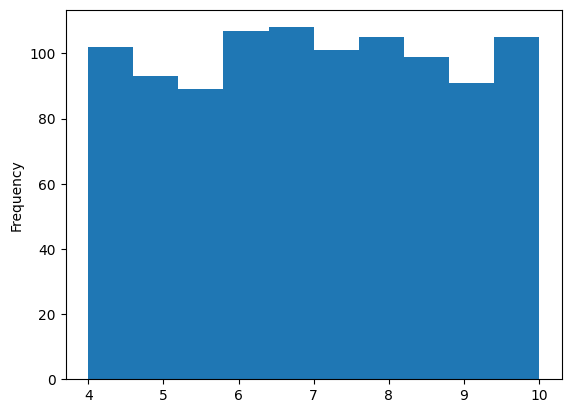

In [ ]:
response = query_engine.query('Você pode plotar a distribuição das avaliações?')

In [ ]:
formatar_texto(response)

Sim, é possível plotar a distribuição das avaliações. Utilizando a biblioteca Pandas, podemos criar
um histograma das avaliações com o comando `df.avaliacao.plot(kind='hist')`. Isso irá gerar um
gráfico que mostra a frequência de cada avaliação, permitindo visualizar a distribuição das
avaliações.


> Pandas Instructions:
```
df.groupby('tipo_produto')['total'].sum().sort_values().plot(kind='barh')
```
> Pandas Output: Axes(0.125,0.11;0.775x0.77)


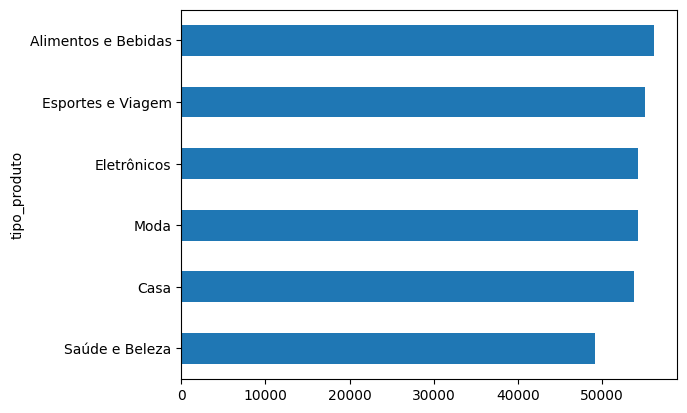

In [ ]:
response = query_engine.query('''Você pode plotar o valor total por tipo de produto,
ordenando do menor para o maior e mantendo as barras na horizontal?''')

In [ ]:
formatar_texto(response)

Sim, é possível plotar o valor total por tipo de produto, ordenando do menor para o maior e mantendo
as barras na horizontal. Para fazer isso, você pode utilizar o seguinte código em Pandas:
`df.groupby('tipo_produto')['total'].sum().sort_values().plot(kind='barh')`  Isso irá agrupar os
dados por tipo de produto, somar os valores totais para cada grupo, ordenar os resultados do menor
para o maior e, finalmente, plotar um gráfico de barras horizontal com os resultados. O gráfico
resultante mostrará os tipos de produtos no eixo y e os valores totais no eixo x, com as barras
ordenadas do menor para o maior.


> Pandas Instructions:
```
df.groupby('tipo_produto')['total'].sum().sort_values().plot(kind='barh')
```
> Pandas Output: Axes(0.125,0.11;0.775x0.77)


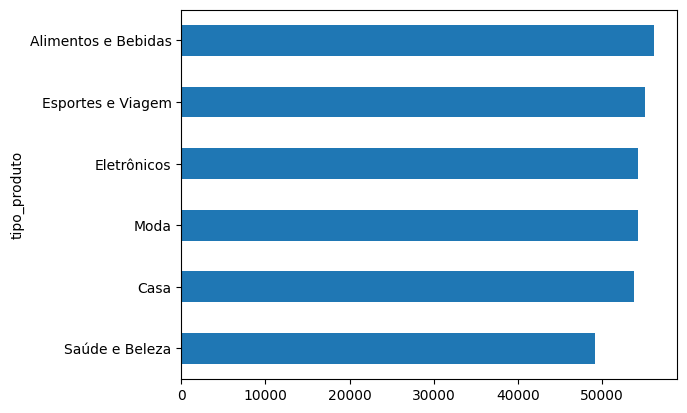

In [ ]:
response = query_engine.query('''Plote o valor total por tipo de produto,
ordenando do menor para o maior e mantendo as barras na horizontal''')

In [ ]:
formatar_texto(response)

Here is a synthesized response based on the query results:  "The total value by product type has
been plotted in a horizontal bar chart, with the values sorted from smallest to largest. The chart
shows the distribution of total values across different product types, providing a clear visual
representation of the data. The horizontal orientation of the bars makes it easy to compare the
values across different product types."


##**Direcionando o idioma das respostas**

In [ ]:
response = query_engine.query('Qual é o método de pagamento mais utilizado em cada filial?')
print(response.response)

> Pandas Instructions:
```
df.groupby('filial')['forma_pagamento'].value_counts().groupby('filial').idxmax()
```
> Pandas Output: filial
A    (A, Carteira Digital)
B    (B, Carteira Digital)
C            (C, Dinheiro)
Name: count, dtype: object
Based on the query results, the most commonly used payment method in each branch is:

* In branch A, the most commonly used payment method is Carteira Digital.
* In branch B, the most commonly used payment method is also Carteira Digital.
* In branch C, the most commonly used payment method is Dinheiro (cash).


In [ ]:
response = query_engine.query('Qual é o método de pagamento mais utilizado em cada filial? Responda em português BR')
print(response.response)

> Pandas Instructions:
```
df.groupby('filial')['forma_pagamento'].value_counts().groupby('filial').idxmax()
```
> Pandas Output: filial
A    (A, Carteira Digital)
B    (B, Carteira Digital)
C            (C, Dinheiro)
Name: count, dtype: object
O método de pagamento mais utilizado em cada filial é:

* Na filial A, o método mais utilizado é a Carteira Digital.
* Na filial B, o método mais utilizado é a Carteira Digital.
* Na filial C, o método mais utilizado é o pagamento em Dinheiro.


In [ ]:
df.groupby('filial')['forma_pagamento'].value_counts()

filial  forma_pagamento  
A       Carteira Digital     126
        Dinheiro             110
        Cartão de Crédito    104
B       Carteira Digital     113
        Dinheiro             110
        Cartão de Crédito    109
C       Dinheiro             124
        Carteira Digital     106
        Cartão de Crédito     98
Name: count, dtype: int64

#**Aula 3: Trabalhando com pipelines**

##**Definindo os módulos do pipeline**

In [ ]:
from llama_index.core import PromptTemplate
from llama_index.experimental.query_engine.pandas import PandasInstructionParser

In [ ]:
# Função para obter uma descrição das colunas do DataFrame
def descricao_colunas(df):
  descricao = '\n'.join([f"`{col}`: {str(df[col].dtype)}" for col in df.columns])
  return 'Aqui estão os detalhes das colunas do DataFrame:\n' + descricao

# Instruções para orientar o modelo a converter uma consulta em linguagem natural em código Python executável com a biblioteca Pandas
instruction_str = (
    "1. Converta a consulta para código Python executável usando Pandas.\n"
    "2. A linha final do código deve ser uma expressão Python que possa ser chamada com a função `eval()`.\n"
    "3. O código deve representar uma solução para a consulta.\n"
    "4. IMPRIMA APENAS A EXPRESSÃO.\n"
    "5. Não coloque a expressão entre aspas.\n")

# Prompt que será enviado ao modelo para que ela gere o código Pandas desejado
pandas_prompt_str = (
    "Você está trabalhando com um dataframe do pandas em Python chamado `df`.\n"
    "{colunas_detalhes}\n\n"
    "Este é o resultado de `print(df.head())`:\n"
    "{df_str}\n\n"
    "Siga estas instruções:\n"
    "{instruction_str}\n"
    "Consulta: {query_str}\n\n"
    "Expressão:"
)

# Prompt para guiar o modelo a sintetizar uma resposta com base nos resultados obtidos pela consulta Pandas
response_synthesis_prompt_str = (
   "Dada uma pergunta de entrada, atue como analista de dados e elabore uma resposta a partir dos resultados da consulta.\n"
   "Responda de forma natural, sem introduções como 'A resposta é:' ou algo semelhante.\n"
   "Consulta: {query_str}\n\n"
   "Instruções do Pandas (opcional):\n{pandas_instructions}\n\n"
   "Saída do Pandas: {pandas_output}\n\n"
   "Resposta:"
   "Ao final, exibir o código usado para gerar a resposta, no formato: O código utilizado foi {pandas_instructions}"
)

# Módulo para obter as instruções Pandas
pandas_prompt = PromptTemplate(pandas_prompt_str).partial_format(
    instruction_str=instruction_str, colunas_detalhes=descricao_colunas(df), df_str=df.head(5)
)
# Módulo para executar as instruções Pandas
pandas_output_parser = PandasInstructionParser(df)

# Módulo para sintetizar a resposta
response_synthesis_prompt = PromptTemplate(response_synthesis_prompt_str)

# Modelo
llm = Groq(model='llama3-70b-8192', api_key=key)

##**Construindo o pipeline de consulta**

In [ ]:
from llama_index.core.query_pipeline import (QueryPipeline as QP, Link, InputComponent)

In [ ]:
# Definindo os módulos do pipeline
qp = QP(
    modules = {
        "input": InputComponent(),
        "pandas_prompt": pandas_prompt,
        "llm1": llm,
        "pandas_output_parser": pandas_output_parser,
        "response_synthesis_prompt": response_synthesis_prompt,
        "llm2": llm
    },
    verbose=True
)

# Definindo a cadeia
qp.add_chain(["input", "pandas_prompt", "llm1", "pandas_output_parser"])

# Definindo os links
qp.add_links(
    [
        Link("input", "response_synthesis_prompt", dest_key="query_str"),

        Link("llm1", "response_synthesis_prompt", dest_key="pandas_instructions"),

        Link("pandas_output_parser", "response_synthesis_prompt", dest_key="pandas_output")
    ]
)
qp.add_link("response_synthesis_prompt", "llm2")

##**Realizando consultas com o pipeline**

In [ ]:
response = qp.run(query_str='Qual é a média gasta por cada tipo de cliente?')

> Running module input with input: 
query_str: Qual é a média gasta por cada tipo de cliente?

> Running module pandas_prompt with input: 
query_str: Qual é a média gasta por cada tipo de cliente?

> Running module llm1 with input: 
messages: Você está trabalhando com um dataframe do pandas em Python chamado `df`.
Aqui estão os detalhes das colunas do DataFrame:
`ID_compra`: object
`filial`: object
`cidade`: object
`tipo_cliente`: object
`...

> Running module pandas_output_parser with input: 
input: assistant: df.groupby('tipo_cliente')['total'].mean()

> Running module response_synthesis_prompt with input: 
query_str: Qual é a média gasta por cada tipo de cliente?
pandas_instructions: assistant: df.groupby('tipo_cliente')['total'].mean()
pandas_output: tipo_cliente
Membro    327.791305
Normal    318.122856
Name: total, dtype: float64

> Running module llm2 with input: 
messages: Dada uma pergunta de entrada, atue como analista de dados e elabore uma resposta a partir dos resultados d

In [ ]:
texto = response.message.content
texto_formatado = textwrap.fill(texto, width=100)
print(texto_formatado)

A média gasta por cada tipo de cliente é de R$ 327,79 para os membros e R$ 318,12 para os clientes
normais.  O código utilizado foi `df.groupby('tipo_cliente')['total'].mean()`


In [ ]:
response = qp.run(query_str='Por que clientes tipo membro tem maior média de gasto?')

> Running module input with input: 
query_str: Por que clientes tipo membro tem maior média de gasto?

> Running module pandas_prompt with input: 
query_str: Por que clientes tipo membro tem maior média de gasto?

> Running module llm1 with input: 
messages: Você está trabalhando com um dataframe do pandas em Python chamado `df`.
Aqui estão os detalhes das colunas do DataFrame:
`ID_compra`: object
`filial`: object
`cidade`: object
`tipo_cliente`: object
`...

> Running module pandas_output_parser with input: 
input: assistant: df.loc[df['tipo_cliente'] == 'Membro', 'total'].mean()

> Running module response_synthesis_prompt with input: 
query_str: Por que clientes tipo membro tem maior média de gasto?
pandas_instructions: assistant: df.loc[df['tipo_cliente'] == 'Membro', 'total'].mean()
pandas_output: 327.7913053892216

> Running module llm2 with input: 
messages: Dada uma pergunta de entrada, atue como analista de dados e elabore uma resposta a partir dos resultados da consulta.
Respo

In [ ]:
texto = response.message.content
texto_formatado = textwrap.fill(texto, width=100)
print(texto_formatado)

Os clientes tipo membro têm uma média de gasto de R$ 327,79, o que é maior em comparação aos outros
tipos de clientes. Isso pode ser devido a various razões, como a lealdade e a confiança que esses
clientes têm na marca, o que os leva a realizar compras mais frequentes e de maior valor. Além
disso, os membros podem ter acesso a ofertas e descontos exclusivos, o que pode aumentar seu gasto
médio.  O código utilizado foi `df.loc[df['tipo_cliente'] == 'Membro', 'total'].mean()`


#**Aula 4: Criando uma aplicação**

##**Criando a interface**

In [ ]:
!pip install gradio -q

In [ ]:
import gradio as gr

with gr.Blocks() as app:
    # Campo de entrada de arquivos
    input_arquivo = gr.File(file_count="single", type="filepath", label="Upload CSV")

    # Campo de entrada de texto
    input_pergunta = gr.Textbox(label="Digite sua pergunta sobre os dados")

    # Botão de envio posicionado após a pergunta
    botao_submeter = gr.Button("Enviar")

    # Componente de resposta
    output_resposta = gr.Textbox(label="Resposta")

    # Componente de download
    arquivo_pdf = gr.File(label="Download do PDF")

app.launch(debug=True)

##**Carregando os dados e realizando consultas**

In [ ]:
# Pipeline de consulta
'''Função para obter uma descrição das colunas do DataFrame'''
def descricao_colunas(df):
    descricao = '\n'.join([f"`{col}`: {str(df[col].dtype)}" for col in df.columns])
    return "Aqui estão os detalhes das colunas do dataframe:\n" + descricao

'''Definição de módulos da pipeline'''
def pipeline_consulta(df):
    instruction_str = (
        "1. Converta a consulta para código Python executável usando Pandas.\n"
        "2. A linha final do código deve ser uma expressão Python que possa ser chamada com a função `eval()`.\n"
        "3. O código deve representar uma solução para a consulta.\n"
        "4. IMPRIMA APENAS A EXPRESSÃO.\n"
        "5. Não coloque a expressão entre aspas.\n")

    pandas_prompt_str = (
        "Você está trabalhando com um dataframe do pandas em Python chamado `df`.\n"
        "{colunas_detalhes}\n\n"
        "Este é o resultado de `print(df.head())`:\n"
        "{df_str}\n\n"
        "Siga estas instruções:\n"
        "{instruction_str}\n"
        "Consulta: {query_str}\n\n"
        "Expressão:"
)

    response_synthesis_prompt_str = (
       "Dada uma pergunta de entrada, atue como analista de dados e elabore uma resposta a partir dos resultados da consulta.\n"
       "Responda de forma natural, sem introduções como 'A resposta é:' ou algo semelhante.\n"
       "Consulta: {query_str}\n\n"
       "Instruções do Pandas (opcional):\n{pandas_instructions}\n\n"
       "Saída do Pandas: {pandas_output}\n\n"
       "Resposta: \n\n"
       "Ao final, exibir o código usado em para gerar a resposta, no formato: O código utilizado foi `{pandas_instructions}`"
    )

    pandas_prompt = PromptTemplate(pandas_prompt_str).partial_format(
    instruction_str=instruction_str,
    df_str=df.head(5),
    colunas_detalhes=descricao_colunas(df)
)

    pandas_output_parser = PandasInstructionParser(df)
    response_synthesis_prompt = PromptTemplate(response_synthesis_prompt_str)

    '''Criação do Query Pipeline'''
    qp = QP(
        modules={
            "input": InputComponent(),
            "pandas_prompt": pandas_prompt,
            "llm1": llm,
            "pandas_output_parser": pandas_output_parser,
            "response_synthesis_prompt": response_synthesis_prompt,
            "llm2": llm,
        },
        verbose=True,
    )
    qp.add_chain(["input", "pandas_prompt", "llm1", "pandas_output_parser"])
    qp.add_links(
        [
            Link("input", "response_synthesis_prompt", dest_key="query_str"),
            Link("llm1", "response_synthesis_prompt", dest_key="pandas_instructions"),
            Link("pandas_output_parser", "response_synthesis_prompt", dest_key="pandas_output"),
        ]
    )
    qp.add_link("response_synthesis_prompt", "llm2")
    return qp

In [ ]:
# Função para carregar os dados
def carregar_dados(caminho_arquivo, df_estado):
    if caminho_arquivo is None or caminho_arquivo == "":
        return "Por favor, faça o upload de um arquivo CSV para analisar.", df_estado
    try:
        df = pd.read_csv(caminho_arquivo)
        return "Arquivo carregado com sucesso!", df
    except Exception as e:
        return f"Erro ao carregar arquivo: {str(e)}", df_estado

# Função para processar a pergunta
def processar_pergunta(pergunta, df_estado):
    if df_estado is not None and pergunta:
        qp = pipeline_consulta(df_estado)
        resposta = qp.run(query_str=pergunta)
        return resposta.message.content
    return ""

# Criação da interface gradio
with gr.Blocks() as app:
    # Campo de entrada de arquivos
    input_arquivo = gr.File(file_count="single", type="filepath", label="Upload CSV")

    # Status de upload
    upload_status = gr.Textbox(label="Status do Upload:")

    # Campo de entrada de texto
    input_pergunta = gr.Textbox(label="Digite sua pergunta sobre os dados")

    # Botão de envio posicionado após a pergunta
    botao_submeter = gr.Button("Enviar")

    # Componente de resposta
    output_resposta = gr.Textbox(label="Resposta")

    # Componente de download
    arquivo_pdf = gr.File(label="Download do PDF")

    # Gerenciamento de estados
    df_estado = gr.State(value=None)  # Estado para o dataframe

    # Conectando funções aos componentes
    input_arquivo.change(fn=carregar_dados,
                         inputs=[input_arquivo, df_estado],
                         outputs=[upload_status, df_estado])

    botao_submeter.click(fn=processar_pergunta,
                         inputs=[input_pergunta, df_estado],
                         outputs=output_resposta)

app.launch(debug=True)

##**Armazenando o histórico de perguntas e respostas**

In [ ]:
pip install fpdf -q

In [ ]:
from fpdf import FPDF
from datetime import datetime

# Função para carregar os dados
def carregar_dados(caminho_arquivo, df_estado):
    if caminho_arquivo is None or caminho_arquivo == "":
        return "Por favor, faça o upload de um arquivo CSV para analisar.", df_estado
    try:
        df = pd.read_csv(caminho_arquivo)
        return "Arquivo carregado com sucesso!", df
    except Exception as e:
        return f"Erro ao carregar arquivo: {str(e)}", df_estado

# Função para processar a pergunta
def processar_pergunta(pergunta, df_estado):
    if df_estado is not None and pergunta:
        qp = pipeline_consulta(df_estado)
        resposta = qp.run(query_str=pergunta)
        return resposta.message.content
    return ""

# Função para adicionar a pergunta e a resposta ao historico
def add_historico(pergunta, resposta, historico_estado):
    if pergunta and resposta:
        historico_estado.append((pergunta, resposta))
        return historico_estado

# Função para gerar o PDF
def gerar_pdf(historico_estado):
    if not historico_estado:
        return "Nenhum dado para adicionar ao PDF.", None

    # Gerar nome de arquivo com timestamp
    timestamp = datetime.now().strftime("%Y%m%d%H%M%S")
    caminho_pdf = f"relatorio_perguntas_respostas_{timestamp}.pdf"

    pdf = FPDF()
    pdf.add_page()
    pdf.set_auto_page_break(auto=True, margin=15)

    for pergunta, resposta in historico_estado:
        pdf.set_font("Arial", "B", 14)
        pdf.multi_cell(0, 8, txt=pergunta)
        pdf.ln(2)
        pdf.set_font("Arial", "", 12)
        pdf.multi_cell(0, 8, txt=resposta)
        pdf.ln(6)
    pdf.output(caminho_pdf)
    return caminho_pdf


# Criação da interface gradio
with gr.Blocks() as app:
    # Campo de entrada de arquivos
    input_arquivo = gr.File(file_count="single", type="filepath", label="Upload CSV")

    # Status de upload
    upload_status = gr.Textbox(label="Status do Upload:")

    # Campo de entrada de texto
    input_pergunta = gr.Textbox(label="Digite sua pergunta sobre os dados")

    # Botão de envio posicionado após a pergunta
    botao_submeter = gr.Button("Enviar")

    # Componente de resposta
    output_resposta = gr.Textbox(label="Resposta")

    # Componente de download
    arquivo_pdf = gr.File(label="Download do PDF")

    # Gerenciamento de estados
    df_estado = gr.State(value=None)  # Estado para o dataframe
    historico_estado = gr.State(value=[])  # Estado para o histórico

    # Conectando funções aos componentes
    input_arquivo.change(fn=carregar_dados,
                         inputs=[input_arquivo, df_estado],
                         outputs=[upload_status, df_estado])

    botao_submeter.click(fn=processar_pergunta,
                         inputs=[input_pergunta, df_estado],
                         outputs=output_resposta)

    app.launch(debug=True)

##**Obtendo o relatório**

In [ ]:
from fpdf import FPDF
from datetime import datetime

# Função para carregar os dados
def carregar_dados(caminho_arquivo, df_estado):
    if caminho_arquivo is None or caminho_arquivo == "":
        return "Por favor, faça o upload de um arquivo CSV para analisar.", df_estado
    try:
        df = pd.read_csv(caminho_arquivo)
        return "Arquivo carregado com sucesso!", df
    except Exception as e:
        return f"Erro ao carregar arquivo: {str(e)}", df_estado

# Função para processar a pergunta
def processar_pergunta(pergunta, df_estado):
    if df_estado is not None and pergunta:
        qp = pipeline_consulta(df_estado)
        resposta = qp.run(query_str=pergunta)
        return resposta.message.content
    return ""

# Função para adicionar a pergunta e a resposta ao historico
def add_historico(pergunta, resposta, historico_estado):
    if pergunta and resposta:
        historico_estado.append((pergunta, resposta))
        return historico_estado

# Função para gerar o PDF
def gerar_pdf(historico_estado):
    if not historico_estado:
        return "Nenhum dado para adicionar ao PDF.", None

    # Gerar nome de arquivo com timestamp
    timestamp = datetime.now().strftime("%Y%m%d%H%M%S")
    caminho_pdf = f"relatorio_perguntas_respostas_{timestamp}.pdf"

    pdf = FPDF()
    pdf.add_page()
    pdf.set_auto_page_break(auto=True, margin=15)

    for pergunta, resposta in historico_estado:
        pdf.set_font("Arial", 'B', 14)
        pdf.multi_cell(0, 8, txt=pergunta)
        pdf.ln(2)
        pdf.set_font("Arial", '', 12)
        pdf.multi_cell(0, 8, txt=resposta)
        pdf.ln(6)

    pdf.output(caminho_pdf)
    return caminho_pdf

# Criação da interface gradio
with gr.Blocks() as app:
    # Campo de entrada de arquivos
    input_arquivo = gr.File(file_count="single", type="filepath", label="Upload CSV")

    # Status de upload
    upload_status = gr.Textbox(label="Status do Upload:")

    # Campo de entrada de texto
    input_pergunta = gr.Textbox(label="Digite sua pergunta sobre os dados")

    # Botão de envio posicionado após a pergunta
    botao_submeter = gr.Button("Enviar")

    # Componente de resposta
    output_resposta = gr.Textbox(label="Resposta")

    # Botão para adicionar a pergunta e a resposta ao historico
    botao_add_pdf = gr.Button("Adicionar ao histórico do PDF")

    # Botão para gerar o PDF
    botao_gerar_pdf = gr.Button("Gerar PDF")

    # Componente de download
    arquivo_pdf = gr.File(label="Download do PDF")

    # Gerenciamento de estados
    df_estado = gr.State(value=None)  # Estado para o dataframe
    historico_estado = gr.State(value=[])  # Estado para o histórico

    # Conectando funções aos componentes
    input_arquivo.change(fn=carregar_dados,
                         inputs=[input_arquivo, df_estado],
                         outputs=[upload_status, df_estado])

    botao_submeter.click(fn=processar_pergunta,
                         inputs=[input_pergunta, df_estado],
                         outputs=output_resposta)

    botao_add_pdf.click(fn=add_historico,
                        inputs=[input_pergunta, output_resposta, historico_estado],
                        outputs=historico_estado)

    botao_gerar_pdf.click(fn=gerar_pdf,
                          inputs=[historico_estado],
                          outputs=arquivo_pdf)

    app.launch(debug=True)

#**Aula 5: Aprimorando a aplicação**

##**Adicionando mais funcionalidades**

In [ ]:
import gradio as gr
from fpdf import FPDF
from datetime import datetime

# Função para carregar os dados
def carregar_dados(caminho_arquivo, df_estado):
    if caminho_arquivo is None or caminho_arquivo == "":
        return "Por favor, faça o upload de um arquivo CSV para analisar.", pd.DataFrame(), df_estado
    try:
        df = pd.read_csv(caminho_arquivo)
        return "Arquivo carregado com sucesso!", df.head(), df
    except Exception as e:
        return f"Erro ao carregar arquivo: {str(e)}", pd.DataFrame(), df_estado

# Função para processar a pergunta
def processar_pergunta(pergunta, df_estado):
    if df_estado is not None and pergunta:
        qp = pipeline_consulta(df_estado)
        resposta = qp.run(query_str=pergunta)
        return resposta.message.content
    return ""

# Função para adicionar a pergunta e a resposta ao historico
def add_historico(pergunta, resposta, historico_estado):
    if pergunta and resposta:
        historico_estado.append((pergunta, resposta))
        gr.Info("Adicionado ao PDF!", duration=2)
        return historico_estado

# Função para gerar o PDF
def gerar_pdf(historico_estado):
    if not historico_estado:
        return "Nenhum dado para adicionar ao PDF.", None

    # Gerar nome de arquivo com timestamp
    timestamp = datetime.now().strftime("%Y%m%d%H%M%S")
    caminho_pdf = f"relatorio_perguntas_respostas_{timestamp}.pdf"

    pdf = FPDF()
    pdf.add_page()
    pdf.set_auto_page_break(auto=True, margin=15)

    for pergunta, resposta in historico_estado:
        pdf.set_font("Arial", "B", 14)
        pdf.multi_cell(0, 8, txt=pergunta)
        pdf.ln(2)
        pdf.set_font("Arial", "", 12)
        pdf.multi_cell(0, 8, txt=resposta)
        pdf.ln(6)

    pdf.output(caminho_pdf)
    return caminho_pdf

# Função para limpar a pergunta e a resposta
def limpar_pergunta_resposta():
    return "", ""

# Função para resetar a aplicação
def resetar_aplicação():
    return None, "A aplicação foi resetada. Por favor, faça upload de um novo arquivo CSV.", pd.DataFrame(), "", None, [], ""

# Criação da interface gradio
with gr.Blocks() as app:

    # Campo de entrada de arquivos
    input_arquivo = gr.File(file_count="single", type="filepath", label="Upload CSV")

    # Status de upload
    upload_status = gr.Textbox(label="Status do Upload:")

    # Tabela de dados
    tabela_dados = gr.DataFrame()

    # Campo de entrada de texto
    input_pergunta = gr.Textbox(label="Digite sua pergunta sobre os dados")

    # Botão de envio posicionado após a pergunta
    botao_submeter = gr.Button("Enviar")

    # Componente de resposta
    output_resposta = gr.Textbox(label="Resposta")

    # Botões para limpar a pergunta e a resposta, adicionar ao historico e gerar o PDF
    with gr.Row():
        botao_limpeza = gr.Button("Limpar pergunta e resultado")
        botao_add_pdf = gr.Button("Adicionar ao histórico do PDF")
        botao_gerar_pdf = gr.Button("Gerar PDF")

    # Componente de download
    arquivo_pdf = gr.File(label="Download do PDF")

    # Botão para resetar a aplicação
    botao_resetar = gr.Button("Quero analisar outro dataset!")

    # Gerenciamento de estados
    df_estado = gr.State(value=None)  # Estado para o dataframe
    historico_estado = gr.State(value=[])  # Estado para o histórico

    # Conectando funções aos componentes
    input_arquivo.change(fn=carregar_dados,
                         inputs=[input_arquivo, df_estado],
                         outputs=[upload_status, tabela_dados, df_estado]) # add tabela_dados

    botao_submeter.click(fn=processar_pergunta,
                         inputs=[input_pergunta, df_estado],
                         outputs=output_resposta)

    botao_limpeza.click(fn=limpar_pergunta_resposta,
                        inputs=[],
                        outputs=[input_pergunta, output_resposta])

    botao_add_pdf.click(fn=add_historico,
                        inputs=[input_pergunta, output_resposta, historico_estado],
                        outputs=historico_estado)

    botao_gerar_pdf.click(fn=gerar_pdf,
                          inputs=[historico_estado],
                          outputs=arquivo_pdf)

    botao_resetar.click(fn=resetar_aplicação,
                        inputs=[],
                        outputs=[input_arquivo, upload_status, tabela_dados, output_resposta,
                                 arquivo_pdf, historico_estado, input_pergunta])

    app.launch(debug=True)

##**Personalizando a aplicação**

In [ ]:
import gradio as gr
from fpdf import FPDF
from datetime import datetime

# Função para carregar os dados
def carregar_dados(caminho_arquivo, df_estado):
    if caminho_arquivo is None or caminho_arquivo == "":
        return "Por favor, faça o upload de um arquivo CSV para analisar.", pd.DataFrame(), df_estado
    try:
        df = pd.read_csv(caminho_arquivo)
        return "Arquivo carregado com sucesso!", df.head(), df
    except Exception as e:
        return f"Erro ao carregar arquivo: {str(e)}", pd.DataFrame(), df_estado

# Função para processar a pergunta
def processar_pergunta(pergunta, df_estado):
    if df_estado is not None and pergunta:
        qp = pipeline_consulta(df_estado)
        resposta = qp.run(query_str=pergunta)
        return resposta.message.content
    return ""

# Função para adicionar a pergunta e a resposta ao historico
def add_historico(pergunta, resposta, historico_estado):
    if pergunta and resposta:
        historico_estado.append((pergunta, resposta))
        gr.Info("Adicionado ao PDF!", duration=2)
        return historico_estado

# Função para gerar o PDF
def gerar_pdf(historico_estado):
    if not historico_estado:
        return "Nenhum dado para adicionar ao PDF.", None

    # Gerar nome de arquivo com timestamp
    timestamp = datetime.now().strftime("%Y%m%d%H%M%S")
    caminho_pdf = f"relatorio_perguntas_respostas_{timestamp}.pdf"

    pdf = FPDF()
    pdf.add_page()
    pdf.set_auto_page_break(auto=True, margin=15)

    for pergunta, resposta in historico_estado:
        pdf.set_font("Arial", 'B', 14)
        pdf.multi_cell(0, 8, txt=pergunta)
        pdf.ln(2)
        pdf.set_font("Arial", '', 12)
        pdf.multi_cell(0, 8, txt=resposta)
        pdf.ln(6)

    pdf.output(caminho_pdf)
    return caminho_pdf

# Função para limpar a pergunta e a resposta
def limpar_pergunta_resposta():
    return "", ""

# Função para resetar a aplicação
def resetar_aplicação():
    return None, "A aplicação foi resetada. Por favor, faça upload de um novo arquivo CSV.", pd.DataFrame(), "", None, [], ""

# Criação da interface gradio
with gr.Blocks(theme="Soft") as app:

    # Título da app
    gr.Markdown("# Analisando os dados🔎🎲")

    # Descrição
    gr.Markdown("""
    Carregue um arquivo CSV e faça perguntas sobre os dados. A cada pergunta, você poderá
    visualizar a resposta e, se desejar, adicionar essa interação ao PDF final, basta clicar
    em "Adicionar ao histórico do PDF". Para fazer uma nova pergunta, clique em "Limpar pergunta e resultado".
    Após definir as perguntas e respostas no histórico, clique em "Gerar PDF". Assim, será possível
    baixar um PDF com o registro completo das suas interações. Se você quiser analisar um novo dataset,
    basta clicar em "Quero analisar outro dataset" ao final da página.
    """)

    # Campo de entrada de arquivos
    input_arquivo = gr.File(file_count="single", type="filepath", label="Upload CSV")

    # Status de upload
    upload_status = gr.Textbox(label="Status do Upload:")

    # Tabela de dados
    tabela_dados = gr.DataFrame()

    # Exemplos de perguntas
    gr.Markdown("""
    Exemplos de perguntas:
    1. Qual é o número de registros no arquivo?
    2. Quais são os tipos de dados das colunas?
    3. Quais são as estatísticas descritivas das colunas numéricas?
    """)

    # Campo de entrada de texto
    input_pergunta = gr.Textbox(label="Digite sua pergunta sobre os dados")

    # Botão de envio posicionado após a pergunta
    botao_submeter = gr.Button("Enviar")

    # Componente de resposta
    output_resposta = gr.Textbox(label="Resposta")

    # Botões para limpar a pergunta e a resposta, adicionar ao historico e gerar o PDF
    with gr.Row():
        botao_limpeza = gr.Button("Limpar pergunta e resultado")
        botao_add_pdf = gr.Button("Adicionar ao histórico do PDF")
        botao_gerar_pdf = gr.Button("Gerar PDF")

    # Componente de download
    arquivo_pdf = gr.File(label="Download do PDF")

    # Botão para resetar a aplicação
    botao_resetar = gr.Button("Quero analisar outro dataset!")

    # Gerenciamento de estados
    df_estado = gr.State(value=None)  # Estado para o dataframe
    historico_estado = gr.State(value=[])  # Estado para o histórico

    # Conectando funções aos componentes
    input_arquivo.change(fn=carregar_dados,
                         inputs=[input_arquivo, df_estado],
                         outputs=[upload_status, tabela_dados, df_estado])

    botao_submeter.click(fn=processar_pergunta,
                         inputs=[input_pergunta, df_estado],
                         outputs=output_resposta)

    botao_limpeza.click(fn=limpar_pergunta_resposta,
                        inputs=[],
                        outputs=[input_pergunta, output_resposta])

    botao_add_pdf.click(fn=add_historico,
                        inputs=[input_pergunta, output_resposta, historico_estado],
                        outputs=historico_estado)

    botao_gerar_pdf.click(fn=gerar_pdf,
                          inputs=[historico_estado],
                          outputs=arquivo_pdf)

    botao_resetar.click(fn=resetar_aplicação,
                        inputs=[],
                        outputs=[input_arquivo, upload_status, tabela_dados, output_resposta, arquivo_pdf, historico_estado, input_pergunta])

    app.launch(debug=True)

##**Compartilhando a aplicação no Hugging Face**

Código que deve ser utilizado para criar o arquivo `app.py`:

In [ ]:
from llama_index.llms.groq import Groq
from llama_index.core import PromptTemplate
from llama_index.experimental.query_engine.pandas import PandasInstructionParser
from llama_index.core.query_pipeline import (QueryPipeline as QP, Link, InputComponent)
import gradio as gr
import pandas as pd
from fpdf import FPDF
from datetime import datetime
import os

# API KEY do GROQ
api_key = os.getenv("secret_key")

# Configuração do modelo
llm = Groq(model="llama3-70b-8192", api_key=api_key)

# Pipeline de consulta
'''Função para gerar a descrição das colunas do dataframe'''
def descricao_colunas(df):
    descricao = '\n'.join([f"`{col}`: {str(df[col].dtype)}" for col in df.columns])
    return "Aqui estão os detalhes das colunas do dataframe:\n" + descricao

'''Definição de módulos da pipeline'''
def pipeline_consulta(df):
    instruction_str = (
        "1. Converta a consulta para código Python executável usando Pandas.\n"
        "2. A linha final do código deve ser uma expressão Python que possa ser chamada com a função `eval()`.\n"
        "3. O código deve representar uma solução para a consulta.\n"
        "4. IMPRIMA APENAS A EXPRESSÃO.\n"
        "5. Não coloque a expressão entre aspas.\n")

    pandas_prompt_str = (
        "Você está trabalhando com um dataframe do pandas em Python chamado `df`.\n"
        "{colunas_detalhes}\n\n"
        "Este é o resultado de `print(df.head())`:\n"
        "{df_str}\n\n"
        "Siga estas instruções:\n"
        "{instruction_str}\n"
        "Consulta: {query_str}\n\n"
        "Expressão:"
)

    response_synthesis_prompt_str = (
       "Dada uma pergunta de entrada, atue como analista de dados e elabore uma resposta a partir dos resultados da consulta.\n"
       "Responda de forma natural, sem introduções como 'A resposta é:' ou algo semelhante.\n"
       "Consulta: {query_str}\n\n"
       "Instruções do Pandas (opcional):\n{pandas_instructions}\n\n"
       "Saída do Pandas: {pandas_output}\n\n"
       "Resposta: \n\n"
       "Ao final, exibir o código usado em para gerar a resposta, no formato: O código utilizado foi `{pandas_instructions}`"
    )

    pandas_prompt = PromptTemplate(pandas_prompt_str).partial_format(
    instruction_str=instruction_str,
    df_str=df.head(5),
    colunas_detalhes=descricao_colunas(df)
)

    pandas_output_parser = PandasInstructionParser(df)
    response_synthesis_prompt = PromptTemplate(response_synthesis_prompt_str)

    '''Criação do Query Pipeline'''
    qp = QP(
        modules={
            "input": InputComponent(),
            "pandas_prompt": pandas_prompt,
            "llm1": llm,
            "pandas_output_parser": pandas_output_parser,
            "response_synthesis_prompt": response_synthesis_prompt,
            "llm2": llm,
        },
        verbose=True,
    )
    qp.add_chain(["input", "pandas_prompt", "llm1", "pandas_output_parser"])
    qp.add_links(
        [
            Link("input", "response_synthesis_prompt", dest_key="query_str"),
            Link("llm1", "response_synthesis_prompt", dest_key="pandas_instructions"),
            Link("pandas_output_parser", "response_synthesis_prompt", dest_key="pandas_output"),
        ]
    )
    qp.add_link("response_synthesis_prompt", "llm2")
    return qp

# Função para carregar os dados
def carregar_dados(caminho_arquivo, df_estado):
    if caminho_arquivo is None or caminho_arquivo == "":
        return "Por favor, faça o upload de um arquivo CSV para analisar.", pd.DataFrame(), df_estado
    try:
        df = pd.read_csv(caminho_arquivo)
        return "Arquivo carregado com sucesso!", df.head(), df
    except Exception as e:
        return f"Erro ao carregar arquivo: {str(e)}", pd.DataFrame(), df_estado

# Função para processar a pergunta
def processar_pergunta(pergunta, df_estado):
    if df_estado is not None and pergunta:
        qp = pipeline_consulta(df_estado)
        resposta = qp.run(query_str=pergunta)
        return resposta.message.content
    return ""

# Função para adicionar a pergunta e a resposta ao histórico
def add_historico(pergunta, resposta, historico_estado):
    if pergunta and resposta:
        historico_estado.append((pergunta, resposta))
        gr.Info("Adicionado ao PDF!", duration=2)
        return historico_estado

# Função para gerar o PDF
def gerar_pdf(historico_estado):
    if not historico_estado:
        return "Nenhum dado para adicionar ao PDF.", None

    # Gerar nome de arquivo com timestamp
    timestamp = datetime.now().strftime("%Y%m%d%H%M%S")
    caminho_pdf = f"relatorio_perguntas_respostas_{timestamp}.pdf"

    pdf = FPDF()
    pdf.add_page()
    pdf.set_auto_page_break(auto=True, margin=15)

    for pergunta, resposta in historico_estado:
        pdf.set_font("Arial", "B", 14)
        pdf.multi_cell(0, 8, txt=pergunta)
        pdf.ln(2)
        pdf.set_font("Arial", "", 12)
        pdf.multi_cell(0, 8, txt=resposta)
        pdf.ln(6)

    pdf.output(caminho_pdf)
    return caminho_pdf

# Função para limpar a pergunta e a resposta
def limpar_pergunta_resposta():
    return "", ""

# Função para resetar a aplicação
def resetar_aplicacao():
    return None, "A aplicação foi resetada. Por favor, faça upload de um novo arquivo CSV.", pd.DataFrame(), "", None, [], ""

# Criação da interface gradio
with gr.Blocks(theme="Soft") as app:

    # Título da app
    gr.Markdown("# Analisando os dados🔎🎲")

    # Descrição
    gr.Markdown("""
    Carregue um arquivo CSV e faça perguntas sobre os dados. A cada pergunta, você poderá
    visualizar a resposta e, se desejar, adicionar essa interação ao PDF final, basta clicar
    em "Adicionar ao histórico do PDF". Para fazer uma nova pergunta, clique em "Limpar pergunta e resultado".
    Após definir as perguntas e respostas no histórico, clique em "Gerar PDF". Assim, será possível
    baixar um PDF com o registro completo das suas interações. Se você quiser analisar um novo dataset,
    basta clicar em "Quero analisar outro dataset" ao final da página.
    """)

    # Campo de entrada de arquivos
    input_arquivo = gr.File(file_count="single", type="filepath", label="Upload CSV")

    # Status de upload
    upload_status = gr.Textbox(label="Status do Upload:")

    # Tabela de dados
    tabela_dados = gr.DataFrame()

    # Exemplos de perguntas
    gr.Markdown("""
    Exemplos de perguntas:
    1. Qual é o número de registros no arquivo?
    2. Quais são os tipos de dados das colunas?
    3. Quais são as estatísticas descritivas das colunas numéricas?
    """)

    # Campo de entrada de texto
    input_pergunta = gr.Textbox(label="Digite sua pergunta sobre os dados")

    # Botão de envio posicionado após a pergunta
    botao_submeter = gr.Button("Enviar")

    # Componente de resposta
    output_resposta = gr.Textbox(label="Resposta")

    # Botões para limpar a pergunta e a resposta, adicionar ao historico e gerar o PDF
    with gr.Row():
        botao_limpeza = gr.Button("Limpar pergunta e resultado")
        botao_add_pdf = gr.Button("Adicionar ao histórico do PDF")
        botao_gerar_pdf = gr.Button("Gerar PDF")

    # Componente de download
    arquivo_pdf = gr.File(label="Download do PDF")

    # Botão para resetar a aplicação
    botao_resetar = gr.Button("Quero analisar outro dataset!")

    # Gerenciamento de estados
    df_estado = gr.State(value=None)
    historico_estado = gr.State(value=[])

    # Conectando funções aos componentes
    input_arquivo.change(fn=carregar_dados, inputs=[input_arquivo, df_estado], outputs=[upload_status, tabela_dados, df_estado])
    botao_submeter.click(fn=processar_pergunta, inputs=[input_pergunta, df_estado], outputs=output_resposta)
    botao_limpeza.click(fn=limpar_pergunta_resposta, inputs=[], outputs=[input_pergunta, output_resposta])
    botao_add_pdf.click(fn=add_historico, inputs=[input_pergunta, output_resposta, historico_estado], outputs=historico_estado)
    botao_gerar_pdf.click(fn=gerar_pdf, inputs=[historico_estado], outputs=arquivo_pdf)
    botao_resetar.click(fn=resetar_aplicacao, inputs=[], outputs=[input_arquivo, upload_status, tabela_dados, output_resposta, arquivo_pdf, historico_estado, input_pergunta])

if __name__ == "__main__":
    app.launch()

Conteúdo do arquivo `requirements.txt`:

```
pandas==2.2.2
gradio==5.4.0
llama-index==0.11.20
llama-index-llms-groq==0.2.0
llama-index-experimental==0.4.0
fpdf==1.7.2
```